In [58]:
import numpy as np
import networkx as nx
from timeit import default_timer as timer


True
True


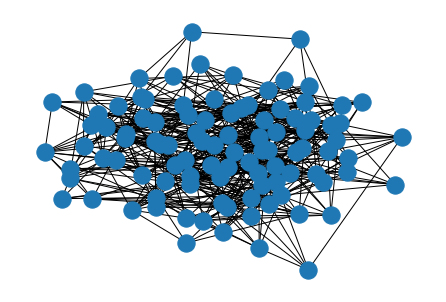

In [59]:
np.random.seed(42)

n = 100
m = 500

g = nx.gnm_random_graph(n, m, seed=42)
weights = np.random.randint(100, size=m)

weights_matrix = np.zeros((m, m))

for i, elem in enumerate(g.edges()):
    g[elem[0]][elem[1]]['weight'] = weights[i]
    g[elem[1]][elem[0]]['weight'] = weights[i]
print(np.all(nx.linalg.graphmatrix.adjacency_matrix(g).todense() == nx.linalg.graphmatrix.adjacency_matrix(g).todense().T))
print(np.all(nx.linalg.graphmatrix.adjacency_matrix(g).todense() >= 0))
nx.draw(g)


In [62]:
n_experiments = 10

def measure_time(n_experiments, method, g, source, dest):
    times = []
    for i in range(n_experiments):
        start_time = timer()
        method(g, source, dest, 'weight')
        times.append(timer() - start_time)
    
    return np.array(times, dtype=np.float64).mean(axis=0)


print('Dijkstra time {:.6f}'.format(measure_time(10, nx.algorithms.shortest_paths.weighted.dijkstra_path, g, 2, 69)))
print('Bellman-Ford time {:.6f}'.format(measure_time(10, nx.algorithms.shortest_paths.weighted.bellman_ford_path, g, 2, 69)))

Dijkstra time 0.000091
Bellman-Ford time 0.001285
